In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy import stats

In [2]:
df = pd.read_csv('/kaggle/input/netlifx-hour-2023/total_netflix_2023 new.csv')

# **1. Data Exploration and Cleaning:**
- Check for missing values in each column.
- Verify data types and convert
  - Convert the 'Release Date' column, currently of object data type, into a datetime format.
  - Filter out non-finite values and convert 'Hours Viewed' to integer
  - Filter out non-finite values and convert 'Number of Ratings' to float
  - Filter out non-finite values and convert 'Rating' to float
- Filter data set drop rows where certain columns have zeros (0), you can use the following code to drop rows where the "Hours Viewed," "Number of Ratings," or "Rating" columns have zeros
- Explore the summary statistics for numeric columns.
- Check for any anomalies or outliers.


In [3]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

In [4]:
df.shape

(18332, 9)

In [5]:
df.isna().sum()

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
Description            0
dtype: int64

In [6]:
columns_to_check = ['Hours Viewed', 'Number of Ratings', 'Rating']
# Filter rows where any of the specified columns have zero values
df_filtered = df[(df[columns_to_check] != '0').all(axis=1)]
df_filtered



Title Available Globally? Release Date  \
0                The Night Agent: Season 1                 Yes   2023-03-23   
1                Ginny & Georgia: Season 2                 Yes   2023-01-05   
2       The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                      Wednesday: Season 1                 Yes   2022-11-23   
4      Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   
...                                    ...                 ...          ...   
14634                        After Met You                  No   2020-09-28   
14635            After My Death // 죄 많은 소녀                  No   2020-04-24   
14636                     After the Sunset                  No   2018-08-10   
14637                     Afterlife (2021)                  No   2018-07-20   
14638         Aftermath // Lad de små børn                  No   2022-01-20   

      Hours Viewed Number of Ratings Rating  \
0        812100000            7696.0    6.0   
1        665100000            5216.0    5.7   
2        622800000           11869.0    8.4   
3        507700000           50077.0    7.4   
4        503000000           45624.0    6.6   
...            ...               ...    ...   
14634       100000          157377.0    7.1   
14635       100000              64.0    6.6   
14636       100000          178295.0    7.1   
14637       100000           68945.0    6.5   
14638       100000           11869.0    8.4   

                                      Genre  \
0                 Biography, Drama, History   
1                     Comedy, Drama,Romance   
2                                 ['Short']   
3           ['Drama', 'History', 'Romance']   
4                     ['Comedy', 'Romance']   
...                                     ...   
14634      ['Action', 'Adventure', 'Crime']   
14635  ['Animation', 'Adventure', 'Comedy']   
14636         ['Comedy', 'Drama', 'Sci-Fi']   
14637                   ['Comedy', 'Drama']   
14638      ['Action', 'Adventure', 'Drama']   

                                               Key Words  \
0      persian empire,empire,5th century b.c.,achaeme...   
1      producer,three word title,headstrong,arranged ...   
2      prequel,queen,historical,england,queen charlot...   
3      christmas,coming out,holidays,lesbian relation...   
4      telenovela,drug trafficking,cartel,femme fatal...   
...                                                  ...   
14634  war on drugs,substance abuse,discriminate just...   
14635                                           musician   
14636  drug abuse,narcotic abuse,overdose,prostitutio...   
14637  christmas,holiday season,sabotage,embarrassing...   
14638  christmas,holiday season,sabotage,embarrassing...   

                                             Description  
0      The film follows headstrong Ginny who meets Su...  
1      Betrothed against her will to King George, you...  
2      A holiday romantic comedy that captures the ra...  
3      The film follows headstrong Ginny who meets Su...  
4      While fleeing from dangerous assailants, an as...  
...                                                  ...  
14634  Armed with tools and engineering smarts, monke...  
14635  Organizers Clea Shearer and Joanna Teplin of T...  
14636  Baby central. A flock of storks is leaving wit...  
14637  A look at the 2001 Seattle Mariners who tied M...  
14638  A murder of a man in an airport restroom leads...  

[14639 rows x 9 columns]

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14639 entries, 0 to 14638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                14639 non-null  object
 1   Available Globally?  14639 non-null  object
 2   Release Date         14639 non-null  object
 3   Hours Viewed         14639 non-null  object
 4   Number of Ratings    14639 non-null  object
 5   Rating               14639 non-null  object
 6   Genre                14639 non-null  object
 7   Key Words            14639 non-null  object
 8   Description          14639 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [8]:
# Convert the 'Release Date' column, currently of object data type, into a datetime format.
pd.options.mode.chained_assignment = None
df_filtered['Release Date'] = pd.to_datetime(df_filtered['Release Date'], errors='coerce', format='%Y-%m-%d')

In [9]:

# Filter out non-finite values and convert 'Hours Viewed' to integer
df_filtered['Hours Viewed'] = pd.to_numeric(df_filtered['Hours Viewed'], errors='coerce')
df_filtered = df_filtered[df_filtered['Hours Viewed'].notna()]  # Filter out NaN values
df_filtered = df_filtered[df_filtered['Hours Viewed'] != 0]     # Filter out 0 values
df_filtered['Hours Viewed'] = df_filtered['Hours Viewed'].astype(int)

In [10]:
# Filter out non-finite values and convert 'Number of Ratings' to float
df_filtered['Number of Ratings'] = pd.to_numeric(df_filtered['Number of Ratings'], errors='coerce')
df_filtered[df_filtered['Number of Ratings'].notna()]  # Filter out NaN values
df_filtered = df_filtered[df_filtered['Number of Ratings'] != 0] # Filter out 0 values
df_filtered['Number of Ratings'] = df_filtered['Number of Ratings'].astype(float)

In [11]:
# Filter out non-finite values and convert 'Rating' to float
df_filtered['Rating'] = pd.to_numeric(df_filtered['Rating'], errors='coerce')
df_filtered[df_filtered['Rating'].notna()]  # Filter out NaN values
df_filtered = df_filtered[df_filtered['Rating'] != 0] # Filter out 0 values
df_filtered['Rating'] = df_filtered['Rating'].astype(float)

In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                14637 non-null  object        
 1   Available Globally?  14637 non-null  object        
 2   Release Date         14637 non-null  datetime64[ns]
 3   Hours Viewed         14637 non-null  int64         
 4   Number of Ratings    14633 non-null  float64       
 5   Rating               14633 non-null  float64       
 6   Genre                14637 non-null  object        
 7   Key Words            14637 non-null  object        
 8   Description          14637 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.1+ MB


# **2. Descriptive Statistics:**
- Compute summary statistics for numeric columns using describe() to get an overview of the distribution, mean, median, and spread of the data.
- Create box plots for numeric columns to visually identify outliers.

In [13]:
numeric_summary = df_filtered.describe()
numeric_summary

Release Date  Hours Viewed  Number of Ratings  \
count                          14637  1.463700e+04       1.463300e+04   
mean   2020-05-10 11:30:37.999590144  1.098065e+07       2.166324e+04   
min              2010-04-01 00:00:00  1.000000e+05       5.000000e+00   
25%              2018-11-30 00:00:00  8.000000e+05       3.080000e+02   
50%              2020-08-04 00:00:00  2.900000e+06       2.364000e+03   
75%              2022-02-08 00:00:00  8.800000e+06       1.168800e+04   
max              2023-06-30 00:00:00  8.121000e+08       1.937639e+06   
std                              NaN  3.235293e+07       8.619837e+04   

             Rating  
count  14633.000000  
mean       6.623775  
min        1.400000  
25%        5.800000  
50%        6.600000  
75%        7.400000  
max       10.000000  
std        1.256376

In [14]:
fig = px.box(df, y=['Hours Viewed', 'Number of Ratings', 'Rating'])
fig.show()


In [15]:
fig = px.scatter(df_filtered, x='Number of Ratings', y='Hours Viewed', title='Scatter Plot: Number of Ratings vs Hours Viewed')
fig.update_layout(xaxis_title='Number of Ratings', yaxis_title='Hours Viewed')
fig.show()

In [16]:
numeric_columns = ['Hours Viewed', 'Number of Ratings', 'Rating']
df_zscore = df_filtered[numeric_columns].apply(zscore)
Q1 = df_filtered[numeric_columns].quantile(0.25)
Q3 = df_filtered[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify rows with values outside the IQR
outliers_iqr = df_filtered[((df_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_iqr

Title Available Globally?  \
0                     The Night Agent: Season 1                 Yes   
1                     Ginny & Georgia: Season 2                 Yes   
2            The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   
3                           Wednesday: Season 1                 Yes   
4           Queen Charlotte: A Bridgerton Story                 Yes   
...                                         ...                 ...   
14628                      Affliction // Pulang                  No   
14631  Afrikou na pionyru // Afrika na Pionieri                  No   
14634                             After Met You                  No   
14636                          After the Sunset                  No   
14637                          Afterlife (2021)                  No   

      Release Date  Hours Viewed  Number of Ratings  Rating  \
0       2023-03-23     812100000             7696.0     6.0   
1       2023-01-05     665100000             5216.0     5.7   
2       2022-12-30     622800000            11869.0     8.4   
3       2022-11-23     507700000            50077.0     7.4   
4       2023-05-04     503000000            45624.0     6.6   
...            ...           ...                ...     ...   
14628   2021-01-01        100000           179564.0     6.7   
14631   2020-05-08        100000            63376.0     8.6   
14634   2020-09-28        100000           157377.0     7.1   
14636   2018-08-10        100000           178295.0     7.1   
14637   2018-07-20        100000            68945.0     6.5   

                                  Genre  \
0             Biography, Drama, History   
1                 Comedy, Drama,Romance   
2                             ['Short']   
3       ['Drama', 'History', 'Romance']   
4                 ['Comedy', 'Romance']   
...                                 ...   
14628                ['Crime', 'Drama']   
14631  ['Action', 'Adventure', 'Drama']   
14634  ['Action', 'Adventure', 'Crime']   
14636     ['Comedy', 'Drama', 'Sci-Fi']   
14637               ['Comedy', 'Drama']   

                                               Key Words  \
0      persian empire,empire,5th century b.c.,achaeme...   
1      producer,three word title,headstrong,arranged ...   
2      prequel,queen,historical,england,queen charlot...   
3      christmas,coming out,holidays,lesbian relation...   
4      telenovela,drug trafficking,cartel,femme fatal...   
...                                                  ...   
14628  children,maternity,human soul,soul transmigrat...   
14631       pubic hair,nudity,sex scene,voyeur,voyeurism   
14634  war on drugs,substance abuse,discriminate just...   
14636  drug abuse,narcotic abuse,overdose,prostitutio...   
14637  christmas,holiday season,sabotage,embarrassing...   

                                             Description  
0      The film follows headstrong Ginny who meets Su...  
1      Betrothed against her will to King George, you...  
2      A holiday romantic comedy that captures the ra...  
3      The film follows headstrong Ginny who meets Su...  
4      While fleeing from dangerous assailants, an as...  
...                                                  ...  
14628  The party keeps on going for Poppy, Branch and...  
14631  Animated misadventures of a hard-partying lemu...  
14634  Armed with tools and engineering smarts, monke...  
14636  Baby central. A flock of storks is leaving wit...  
14637  A look at the 2001 Seattle Mariners who tied M...  

[3545 rows x 9 columns]

# **3. Exploratory Data Analysis (EDA):**
	- Explore the distribution of "Hours Viewed," "Number of Ratings," and "Rating" using histograms and box plots.
	- Analyze the distribution of genres to understand the popularity of different genres.
	- Check for correlations between numerical variables.

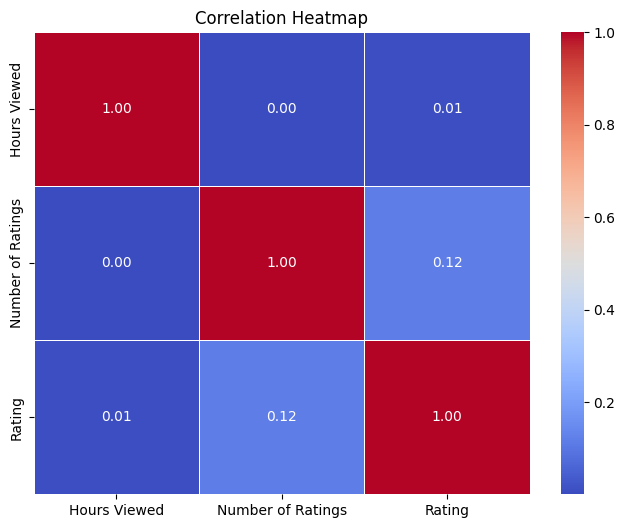

In [17]:

# Correlation matrix
correlation_matrix = df_filtered[['Hours Viewed', 'Number of Ratings', 'Rating']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **4. Time Analysis:**
	Analyze the distribution of releases over time.
	Check if there is any seasonality in the release dates.

In [18]:

# Extract year and month from the 'Release Date' column
df_filtered['Release Year'] = df_filtered['Release Date'].dt.year
df_filtered['Release Month'] = df_filtered['Release Date'].dt.month

# Count releases per month
release_counts = df_filtered.groupby(['Release Year', 'Release Month']).size().reset_index(name='Count')

# Line plot for releases over time using Plotly Express
fig = px.line(release_counts, x='Release Year', y='Count', markers=True, labels={'Count': 'Number of Releases'})
fig.update_layout(title='Distribution of Releases Over Time', xaxis_title='Release Year', yaxis_title='Number of Releases')
fig.show()

# **5. Genre Analysis:**
	Explore the distribution of genres and identify the most popular ones.
	Analyze the average ratings and hours viewed for each genre.

In [19]:

# Countplot for genres
fig_genre_distribution = px.bar(df_filtered['Genre'].value_counts(), orientation='h',
                                 labels={'value': 'Count', 'index': 'Genre'},
                                 title='Distribution of Genres')
fig_genre_distribution.show()

# Average ratings per genre
fig_average_ratings = px.bar(df_filtered.groupby('Genre')['Rating'].mean().reset_index(),
                              x='Rating', y='Genre', orientation='h',
                              labels={'Rating': 'Average Rating', 'Genre': 'Genre'},
                              title='Average Ratings per Genre')
fig_average_ratings.show()

# Average hours viewed per genre
fig_average_hours_viewed = px.bar(df_filtered.groupby('Genre')['Hours Viewed'].mean().reset_index(),
                                   x='Hours Viewed', y='Genre', orientation='h',
                                   labels={'Hours Viewed': 'Average Hours Viewed', 'Genre': 'Genre'},
                                   title='Average Hours Viewed per Genre')
fig_average_hours_viewed.show()


# **6. Top Performers:**
Identify the top-rated shows based on ratings and hours viewed.
Check if there is a correlation between the number of ratings and the overall rating.

In [20]:

# Identify top-rated shows based on ratings
top_rated_shows = df_filtered.nlargest(10, 'Rating')[['Title', 'Rating']]

# Identify top shows based on hours viewed
top_hours_viewed_shows = df_filtered.nlargest(10, 'Hours Viewed')[['Title', 'Hours Viewed']]

# Scatter plot for the correlation between the number of ratings and the overall rating
fig_scatter = px.scatter(df_filtered, x='Number of Ratings', y='Rating',
                         hover_data=['Title'],
                         title='Scatter Plot: Number of Ratings vs Overall Rating')
fig_scatter.update_layout(xaxis_title='Number of Ratings', yaxis_title='Overall Rating')

# Display the identified top-rated shows and top shows based on hours viewed
fig_top_rated = px.bar(top_rated_shows, x='Rating', y='Title', orientation='h',
                       labels={'Rating': 'Overall Rating', 'Title': 'Show'},
                       title='Top-Rated Shows')
fig_top_hours_viewed = px.bar(top_hours_viewed_shows, x='Hours Viewed', y='Title', orientation='h',
                              labels={'Hours Viewed': 'Hours Viewed', 'Title': 'Show'},
                              title='Top Shows Based on Hours Viewed')

# Show the figures
fig_top_rated.show()
fig_top_hours_viewed.show()
fig_scatter.show()

# **7. Keywords Analysis:**
Explore the most common keywords used in the descriptions.
Analyze if certain keywords are associated with higher ratings or more views.

In [21]:

# Extract keywords from the 'Key Words' column
keywords = df_filtered['Key Words'].str.split(',', expand=True).stack().str.strip()

# Count the occurrences of each keyword
keyword_counts = keywords.value_counts()

# Display the most common keywords
print("Most common keywords:")
print(keyword_counts.head(10))

# Merge keyword information back to the original DataFrame
df_keywords = df_filtered.join(keywords.reset_index(level=1, drop=True).rename('Keyword'))

# Analyze if certain keywords are associated with higher ratings
fig_ratings_vs_keywords = px.box(df_keywords, x='Rating', y='Keyword',
                                  category_orders={'Keyword': keyword_counts.index[:10]},
                                  labels={'Rating': 'Overall Rating', 'Keyword': 'Keyword'},
                                  title='Box Plot: Ratings vs Top Keywords')
fig_ratings_vs_keywords.show()

# Analyze if certain keywords are associated with more views
fig_views_vs_keywords = px.box(df_keywords, x='Hours Viewed', y='Keyword',
                                category_orders={'Keyword': keyword_counts.index[:10]},
                                labels={'Hours Viewed': 'Hours Viewed', 'Keyword': 'Keyword'},
                                title='Box Plot: Hours Viewed vs Top Keywords')
fig_views_vs_keywords.show()

Most common keywords:
tv special                 932
stand up comedy special    880
stand up comedy            845
love                       619
christmas                  481
tv mini series             457
murder                     357
sequel                     288
friend                     264
life                       257
Name: count, dtype: int64


In [22]:

# Box plots to compare ratings and hours viewed for shows available globally and not available globally
fig_ratings_comparison = px.box(df_filtered, x='Available Globally?', y='Rating',
                                labels={'Rating': 'Overall Rating', 'Available Globally?': 'Available Globally'},
                                title='Box Plot: Ratings Comparison')
fig_hours_viewed_comparison = px.box(df_filtered, x='Available Globally?', y='Hours Viewed',
                                      labels={'Hours Viewed': 'Hours Viewed', 'Available Globally?': 'Available Globally'},
                                      title='Box Plot: Hours Viewed Comparison')

# Display box plots
fig_ratings_comparison.show()
fig_hours_viewed_comparison.show()

# t-test to check for significant differences in ratings and hours viewed
t_stat_rating, p_value_rating = stats.ttest_ind(df_filtered[df_filtered['Available Globally?'] == 'Yes']['Rating'],
                                                 df_filtered[df_filtered['Available Globally?'] == 'No']['Rating'])
print(f"\nT-test for Ratings - t-statistic: {t_stat_rating}, p-value: {p_value_rating}")

t_stat_hours_viewed, p_value_hours_viewed = stats.ttest_ind(df_filtered[df_filtered['Available Globally?'] == 'Yes']['Hours Viewed'],
                                                             df_filtered[df_filtered['Available Globally?'] == 'No']['Hours Viewed'])
print(f"T-test for Hours Viewed - t-statistic: {t_stat_hours_viewed}, p-value: {p_value_hours_viewed}")


T-test for Ratings - t-statistic: nan, p-value: nan
T-test for Hours Viewed - t-statistic: 9.968723876668848, p-value: 2.4792801589907593e-23


In [23]:
# Box plot for ratings and hours viewed by genre
fig_genre_stats = px.box(df_filtered, x='Genre', y=['Rating', 'Hours Viewed'],
                         labels={'value': 'Count', 'variable': 'Metric', 'Genre': 'Genre'},
                         title='Box Plot: Ratings and Hours Viewed by Genre')
fig_genre_stats.show()


In [24]:
# Box plot for ratings and hours viewed by availability globally
fig_global_stats = px.box(df_filtered, x='Available Globally?', y=['Rating', 'Hours Viewed'],
                          labels={'value': 'Count', 'variable': 'Metric', 'Available Globally?': 'Available Globally'},
                          title='Box Plot: Ratings and Hours Viewed by Availability Globally')
fig_global_stats.show()
